# Project: Investigate a TMDb Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset contains observations of more than 10,000 movies collected from the Movie Database(TMDb). It has 21 columns including revenue,budget,genres,popularity.

<h3>Questions to be discussed</h3>
<ul>
 <li>What is the no. of movies produced with respect to genres?
 <li>Does the buget have any relation with the profit earned?
 <li>Does the revenue have any relation with the profit earned?
 <li>Does the duration of movie have any relation with the profit    earned?
 <li>Is there an increase in profit with the increase in years?
 <li>Is there a relation between popularity and profit?
 <li>What relation does votes have with the popularity?
 <li>Is there any change in the amount of movies produced with increase in year?
 <li>Movies count of various cast.
 <li>Which is the most popular movie and highest gross profited movie?
 <br>
 <br>
 <li>Correlation among various other features
 <li>Analysing hit movies</li>
</ul>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
# Data Wrangling

  ## General Properties
 <ul>
    <li>Loading the dataset</li>
    <li>Viewing the Datatypes</li>
    <li>Looking into what changes to be done</li>
 </ul>

In [2]:
#Load the dataset
tmdb_df = pd.read_csv('tmdb-movies.csv')
#View the dataset
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#View the number of rows and columns
tmdb_df.shape

(10866, 21)

In [4]:
#View the Datatypes of columns
tmdb_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

## Data Cleaning(Removing unneccesary information)
    
  <ul>
    <li>Drop unneccesary columns</li>
    <li>Change the datatypes of required columns</li>
    <li>Drop null values</li>
    <li>Drop duplicated rows</li>
  </ul>
    

### Drop columns

The following datasets seems not to have an impact on the profit or popularity:
<li>imdb_id</li>
<li>homepage</li>
<li>tagline</li>
<li>overview</li>

In [5]:
#Drop unneccesary columns
tmdb_df = tmdb_df.drop(['imdb_id','homepage','tagline','overview'],axis=1)

In [6]:
#View the dataset after dropping columns
tmdb_df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Change Datatypes of required columns

  From the datatypes observed, release_date should be changed to datetime format

In [7]:
#Change the datatype of release_date
tmdb_df.release_date = pd.to_datetime(tmdb_df['release_date'])
#verify the datatypes
tmdb_df.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
keywords                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

### Dealing with null values

In [8]:
#View count of null values
tmdb_df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Observation 

  As the datatypes of these columns are object,it is better to remove these rows.There is an option for the rows to be filled with the mode of the data, but in this dataframe it is better not to fill it with mode and remove them from the dataset.

In [9]:
#Drop null values
tmdb_df.dropna(inplace=True)

### Verify null values 

In [10]:
tmdb_df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### Check for Duplicate rows

In [11]:
#View count of duplicates
tmdb_df.duplicated().sum()

1

### Droping duplicates

In [12]:
#drop duplicates
tmdb_df.drop_duplicates(inplace=True)

### Verify Duplicates

In [13]:
tmdb_df.duplicated().sum()

0

In [14]:
#Verify shape
tmdb_df.shape

(8666, 17)

### Overall information about the dataset

In [15]:
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,8666.000000,8666.000000,8.666000e+03,8.666000e+03,8666.000000,8666.000000,8666.000000,8666.000000,8.666000e+03,8.666000e+03
mean,57003.179206,0.741937,1.770937e+07,4.924863e+07,103.815140,264.204823,6.003612,2000.129818,2.130749e+07,6.362440e+07
std,86242.565745,1.087657,3.357362e+07,1.289529e+08,26.207186,635.195808,0.893539,13.221278,3.710269e+07,1.592874e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9816.750000,0.249990,0.000000e+00,0.000000e+00,91.000000,20.000000,5.500000,1993.000000,0.000000e+00,0.000000e+00
50%,16216.500000,0.449377,1.500000e+06,1.793820e+05,100.000000,54.000000,6.100000,2004.000000,2.130703e+06,1.891237e+05
75%,54003.000000,0.842984,2.100000e+07,3.890269e+07,113.000000,200.000000,6.600000,2011.000000,2.810466e+07,5.524857e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


### My observation after looking at this is that the min revenue is 0 which seems unreal.

In [16]:
#Check for rows which have runtime 0
runtime_zero = tmdb_df['runtime'] == 0
#Display index values
tmdb_df[runtime_zero].shape , tmdb_df[runtime_zero].index.values

((7, 17), array([  92,  334,  486, 1289, 1293, 5920, 5938]))

In [17]:
#View rows with runtime 0
tmdb_df[runtime_zero]

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,sword|magic|sorcery|necromancer,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.000000e+00,0.0
334,361931,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,biography|soccer player,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",2015-11-09,80,6.5,2015,0.000000e+00,0.0
486,333653,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,woman director,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,2015-04-05,11,5.4,2015,0.000000e+00,0.0
1289,286372,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,kidnapping|brutality|violence|teenager|discovery,0,Thriller|Horror|Mystery,Tiberius Film,2014-10-20,16,3.4,2014,2.993546e+06,0.0
1293,286256,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,brazilian|biography|music|drama|documentary,0,Documentary|Drama|Music,Globo Filmes,2014-10-30,14,6.0,2014,0.000000e+00,0.0
5920,248842,0.165765,0,0,The Food Guide to Love,Richard Coyle|Leonor Watling|GinÃ©s GarcÃ­a Mi...,Dominic Harari|Teresa Pelegri,woman director,0,Romance|Comedy,Haut et Court|Parallel Film Productions|Fox In...,2013-12-18,12,5.6,2013,0.000000e+00,0.0
5938,191562,0.147188,0,0,Go Goa Gone,Saif Ali Khan|Anand Tiwari|Vir Das|Pooja Gupta,Krishna D.K.|Raj Nidimoru,hindi|zombies island|zombies|zombie survival,0,Comedy|Horror,Eros International,2013-05-10,16,5.3,2013,0.000000e+00,0.0


### Another important observation is that the budget and revenue are also zero for most of the rows.It is better to remove these rows as these values are not proper for real world problem

In [18]:
#Drop rows with runtime 0
tmdb_df.drop(labels = tmdb_df[runtime_zero].index,inplace=True)

### Verify information

In [19]:
#Verify and view the information
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,8659.000000,8659.000000,8.659000e+03,8.659000e+03,8659.000000,8659.000000,8659.000000,8659.000000,8.659000e+03,8.659000e+03
mean,56809.128999,0.742213,1.772332e+07,4.928845e+07,103.899065,264.399931,6.004123,2000.118489,2.132437e+07,6.367584e+07
std,85990.250531,1.087915,3.358359e+07,1.289975e+08,26.050934,635.415099,0.893356,13.220592,3.711292e+07,1.593415e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,3.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9814.500000,0.250228,0.000000e+00,0.000000e+00,91.000000,21.000000,5.500000,1993.000000,0.000000e+00,0.000000e+00
50%,16194.000000,0.449535,1.500000e+06,1.876740e+05,100.000000,54.000000,6.100000,2004.000000,2.146450e+06,1.949905e+05
75%,53608.000000,0.843159,2.100000e+07,3.894482e+07,113.000000,200.000000,6.600000,2011.000000,2.813358e+07,5.537712e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

### To analyze these questions , we have to have a profit column 

In [20]:
#Inserting a new column 
tmdb_df.insert(4,'profit_earned',tmdb_df['revenue'] - tmdb_df['budget'])
#View the dataset
tmdb_df.head()

,id,popularity,budget,revenue,profit_earned,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [21]:
#Average of profit_earned
tmdb_df['profit_earned'].mean()

31565131.752396349

#### Profit_earned column has been inserted successfully and average profit is calculated

### Let us view histogram of various features

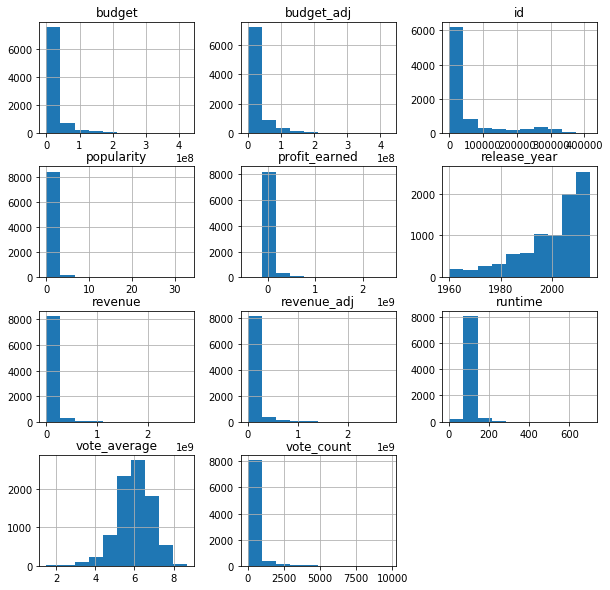

In [22]:
#Histogram of various features
tmdb_df.hist(figsize=(10,10));

#### We can observe that most of the features are skewed to the right and few of them are skewed to the left. Let us discuss about the relations of various features.

### Research Question 1: What is the no. of movies produced with respect to genres?

In [23]:
#Stores all the genres and gives the count of each genre
def category_count(column,tmdb_df):
    #Taking each column and separate string by '|'
    genres = tmdb_df[column].str.cat(sep = '|')
    
    #Making it a series and adding it separately
    genres = pd.Series(genres.split('|'))
    
    #Arrange the genres in descending order
    genre_count = genres.value_counts(ascending = False)
    
    return genre_count


In [24]:
#Store the value returned in the function
genres_count = category_count('genres',tmdb_df)
#Printing the count of genres
genres_count

Drama              3932
Comedy             3048
Thriller           2461
Action             2021
Romance            1414
Horror             1337
Adventure          1270
Crime              1200
Science Fiction    1028
Family              946
Fantasy             762
Mystery             702
Animation           512
Music               308
History             287
Documentary         268
War                 235
Western             154
TV Movie            114
Foreign              90
dtype: int64

In [25]:
#Selecting Top genres for analysis
top_genres = genres_count[:5]
#View top genres
top_genres

Drama       3932
Comedy      3048
Thriller    2461
Action      2021
Romance     1414
dtype: int64

In [26]:
#Percentage of top genres involvement
top_genres_perc = top_genres.sum()/genres_count.sum()
#View the percentage
top_genres_perc

0.58291457286432158

### Plotting count of genres wrt movies

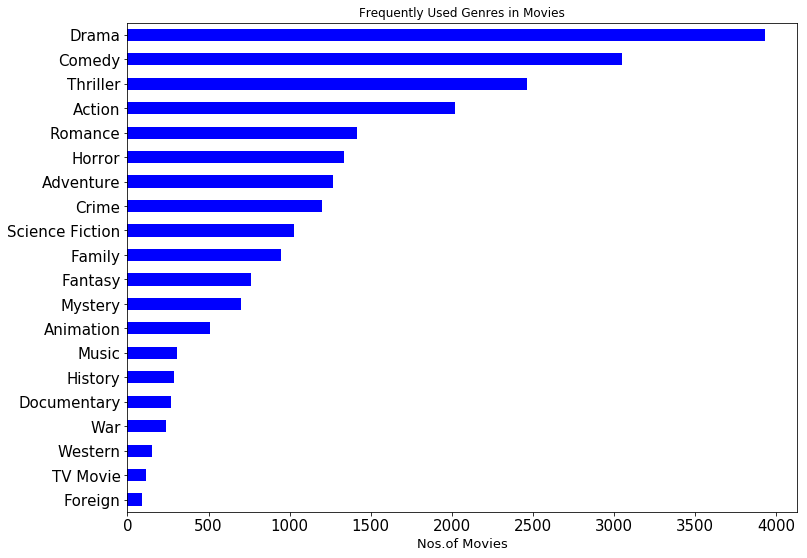

In [27]:
#Plotting the graphs in descending order of count of genres
genres_count.sort_values(ascending = True, inplace = True)

#Plot
lt = genres_count.plot.barh(color = 'blue', fontsize = 15)

#Title
lt.set(title = 'Frequently Used Genres in Movies')

# X-axis label
lt.set_xlabel('Nos.of Movies', color = 'black', fontsize = '13')

#Figure Size
lt.figure.set_size_inches(12, 9)

#Plotting the graph
plt.show()

#### Drama, Comedy, Thriller, Action, Romance have played the major part among all the genres. These genres have contributed to almost 58% of the total genres invloved.

###  Research Question 2: Does the buget have any relation with the profit earned?

In [28]:
#Average budget
tmdb_df['budget'].mean()

17723315.658390116

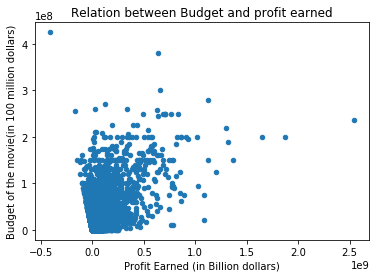

In [29]:
#Plotting budget vs profit_earned
scatter_plot = tmdb_df.plot(x='profit_earned',y='budget',kind='scatter',title='Relation between Budget and profit earned');
#Labelling the plot
scatter_plot.set_xlabel("Profit Earned (in Billion dollars)");
scatter_plot.set_ylabel("Budget of the movie(in 100 million dollars)");

#### Seems like it has a positive correlation among these variables.

###  Research Question 3: Does the revenue have any relation with the profit earned?

In [30]:
#Average revenue
tmdb_df['revenue'].mean()

49288447.410786465

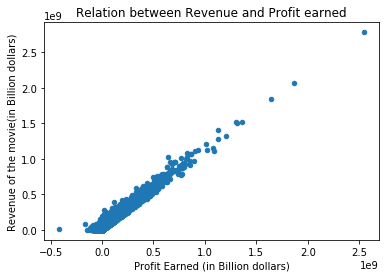

In [31]:
#Plotting revenue vs profit_earned
scatter_plot = tmdb_df.plot(x='profit_earned',y='revenue',kind='scatter',title="Relation between Revenue and Profit earned");
#Labelling the plot
scatter_plot.set_xlabel("Profit Earned (in Billion dollars)");
scatter_plot.set_ylabel("Revenue of the movie(in Billion dollars)");

#### It seems like it has a very strong positive relation and this could be true because the more revenue the more profit based on what the budget is.

###  Research Question 4: Does the duration of movie have any relation with the profit earned?

In [32]:
#Average runtime
tmdb_df['runtime'].mean()

103.8990645571082

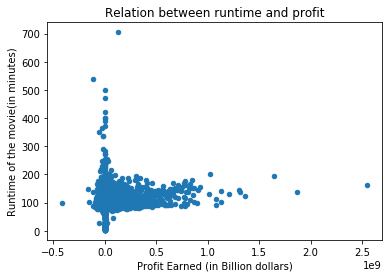

In [33]:
#Plotting runtime vs profit_earned
scatter_plot = tmdb_df.plot(x='profit_earned',y='runtime',kind='scatter',title="Relation between runtime and profit");
#Labelling the plot
scatter_plot.set_xlabel("Profit Earned (in Billion dollars)");
scatter_plot.set_ylabel("Runtime of the movie(in minutes)");

#### With this graph we cannot conclude that there is a proper relation between them. But what I can say is most of the movies will have to settle with  an average runtime and it would be better not to have a movie with more runtime as the viewers would not like to watch a movie for such a long time.

###  Research Question 5: Is there an increase in profit with the increase in years?

In [34]:
# Sum of profits in the year
profit_year = tmdb_df.groupby('release_year')['profit_earned'].sum()

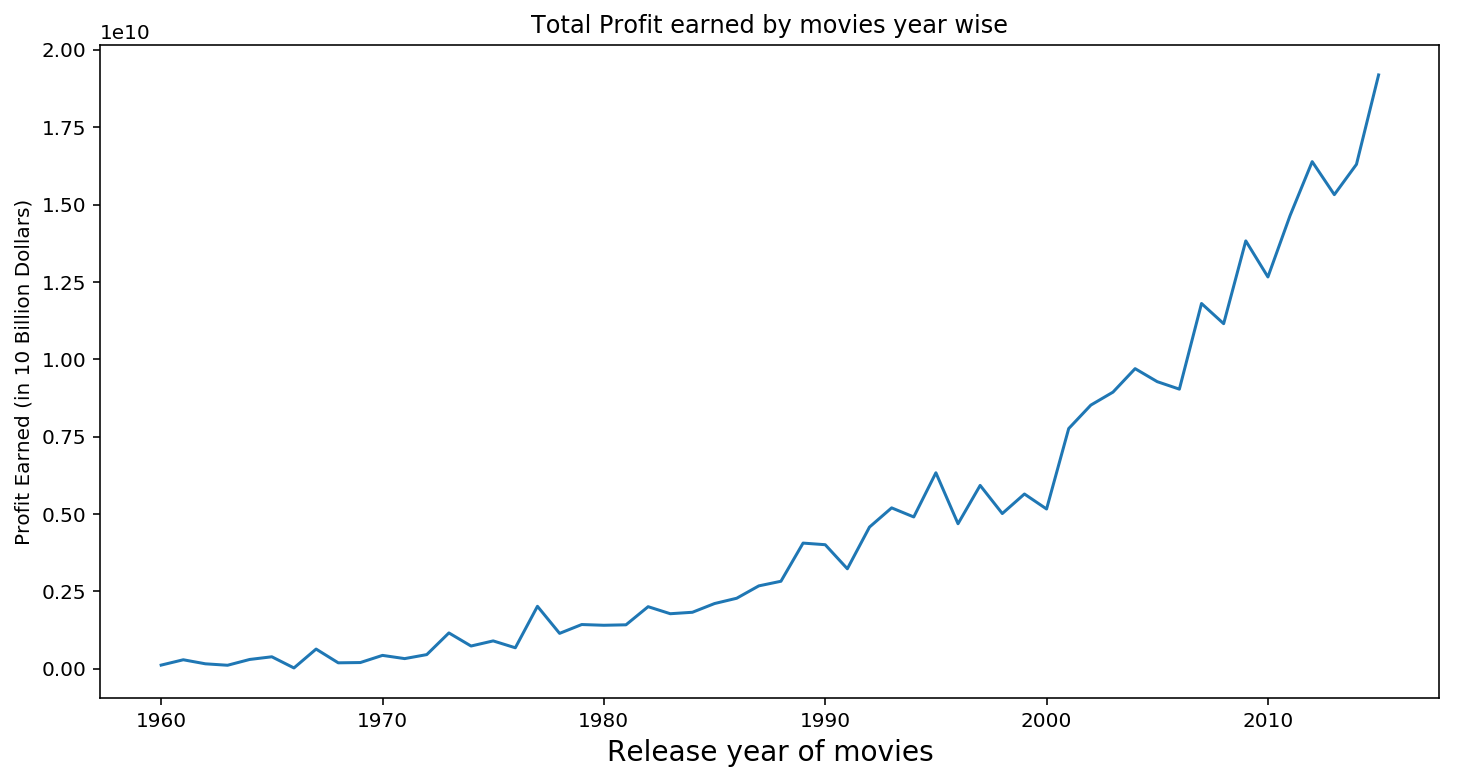

In [35]:
#Set figure size
plt.figure(figsize=(12,6),dpi=144)

#Labelling
plt.xlabel('Release year of movies',fontsize=14)
plt.ylabel('Profit Earned (in 10 Billion Dollars)')
plt.title('Total Profit earned by movies year wise')

#Plotting
plt.plot(profit_year);

In [36]:
#Information about profit_earned year-wise
profit_year.describe()

count    5.600000e+01
mean     4.880758e+09
std      5.142205e+09
min      2.718189e+07
25%      7.213913e+08
50%      2.753538e+09
75%      7.951514e+09
max      1.918804e+10
Name: profit_earned, dtype: float64

##### We can observe that there is a tremendous increase in the profit earned with an increase in the years.

###  Research Question 6: Is there a relation between popularity and profit?

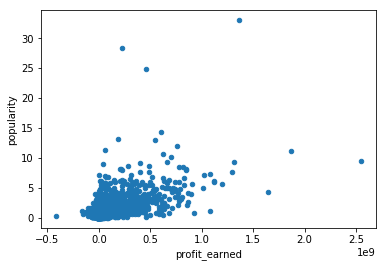

In [37]:
#Plotting popularity vs profit
tmdb_df.plot(x='profit_earned',y='popularity',kind='scatter');

#### It seems like there is positive correlation and this would probably be true as is obvious that the popularity influences the profit earned for a particular movie

###  Research Question 7: What relation does votes have with the popularity?

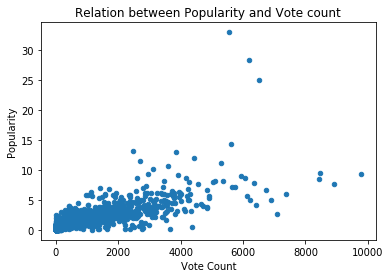

In [38]:
#Plotting popularity vs vote_average
scatter_plot = tmdb_df.plot(x='vote_count',y='popularity',kind='scatter',title="Relation between Popularity and Vote count");
#Labelling the plot
scatter_plot.set_xlabel("Vote Count");
scatter_plot.set_ylabel("Popularity");

#### It seems like there is a positive correlation between them. It is true because ,if there are more votes for a particular movie then it implies that the movie is popular.

###  Research Question 8: Is there any change in the amount of movies produced with increase in year?

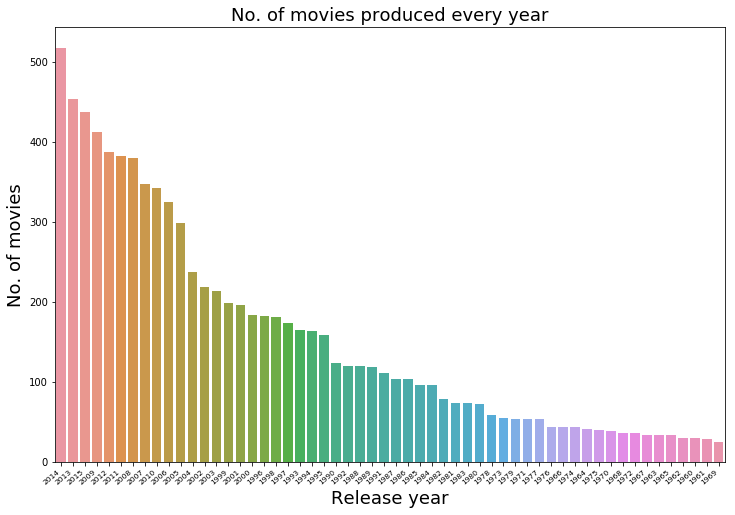

In [39]:
#Set Figure size
plt.figure(figsize=(12,8))

#Bar plot for No. of movies produced per year
bar_count = sns.countplot(x='release_year', data = tmdb_df,order = tmdb_df['release_year'].value_counts().index)

#Roate xticklabels for better visualization
bar_count.set_xticklabels(bar_count.get_xticklabels(),rotation = 40, ha= 'right', fontsize = 7.6);

#Labelling
plt.xlabel('Release year',fontsize=18);
plt.ylabel('No. of movies',fontsize=18);
plt.title('No. of movies produced every year',fontsize=18);
plt.show()

#### From this visualization, there is a huge amount of increase in the amount of movies produced yearly from 1960s to present(2010s).

### Research Question 9: Movies count of  various casts.

In [40]:
#Total no. of movies by a cast
cast_count = category_count('cast',tmdb_df)
#View the top cast and count of their movies
top_cast = cast_count[:30] 
top_cast

Robert De Niro        68
Samuel L. Jackson     65
Bruce Willis          61
Nicolas Cage          59
Michael Caine         50
Robin Williams        48
John Goodman          47
Morgan Freeman        47
Tom Hanks             46
John Cusack           46
Alec Baldwin          45
Julianne Moore        44
Liam Neeson           44
Clint Eastwood        43
Gene Hackman          43
Dennis Quaid          43
Susan Sarandon        43
Johnny Depp           43
Nicole Kidman         42
Willem Dafoe          42
John Travolta         41
Meryl Streep          41
Sylvester Stallone    41
Donald Sutherland     40
Woody Harrelson       40
Christopher Walken    39
Harrison Ford         39
Dustin Hoffman        39
Robert Downey Jr.     39
Ewan McGregor         39
dtype: int64

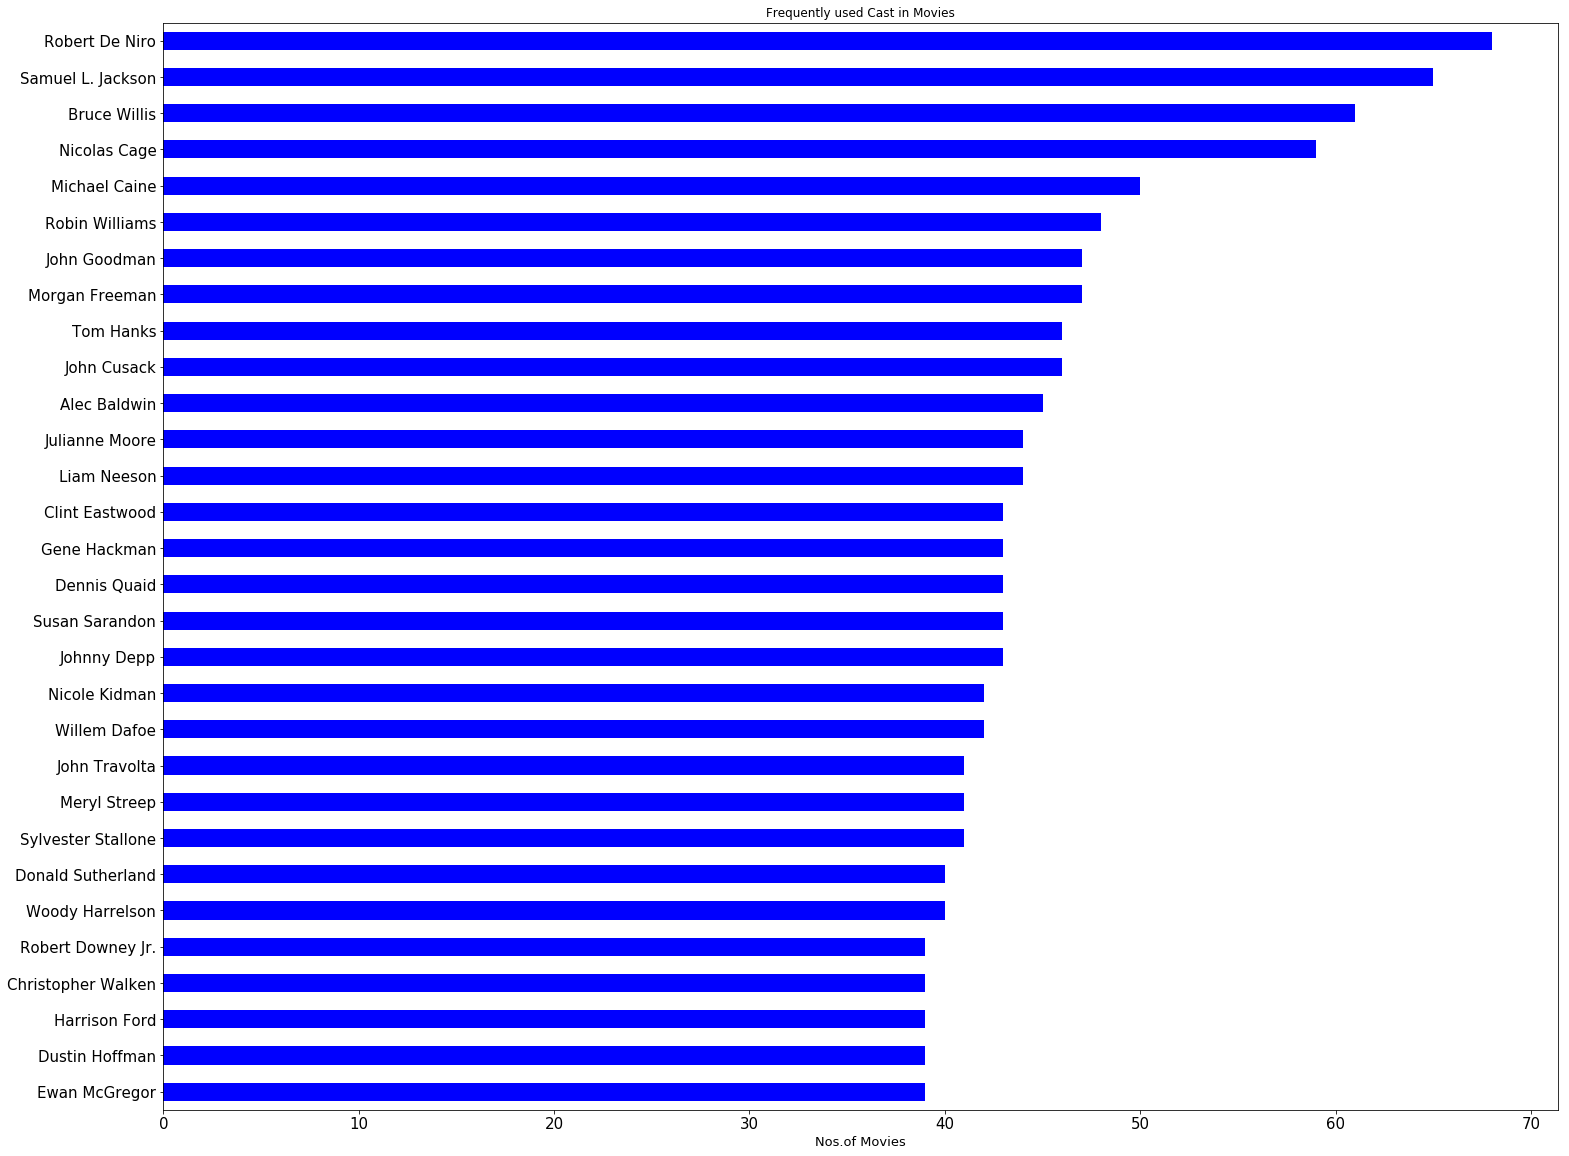

In [41]:
#Plotting the graphs in descending order of count of no. of movies
top_cast.sort_values(ascending = True, inplace = True)

#Plot
lt = top_cast.plot.barh(color = 'blue', fontsize = 15)

#Title
lt.set(title = 'Frequently used Cast in Movies')

# X-axis label
lt.set_xlabel('Nos.of Movies', color = 'black', fontsize = '13')

#Figure Size
lt.figure.set_size_inches(25,20)

#Plotting the graph
plt.show()

#### From this plot, we can observe the no. of movies the top cast have acted. 

### Research Question 10: Which is the most popular movie and highest gross profited movie till date?

In [42]:
tmdb_df[tmdb_df['popularity'] == tmdb_df['popularity'].max()]

,id,popularity,budget,revenue,profit_earned,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [43]:
tmdb_df[tmdb_df['profit_earned'] == tmdb_df['profit_earned'].max()]

,id,popularity,budget,revenue,profit_earned,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000,2781505847,2544505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09


#### Popular movie - Jurassic World
#### Highest gross profited movie - Avatar

### Correlation among various features

In [44]:
#filter dataset to correlate features
filtered_df = tmdb_df[['popularity','budget','revenue','profit_earned','runtime','vote_average']]

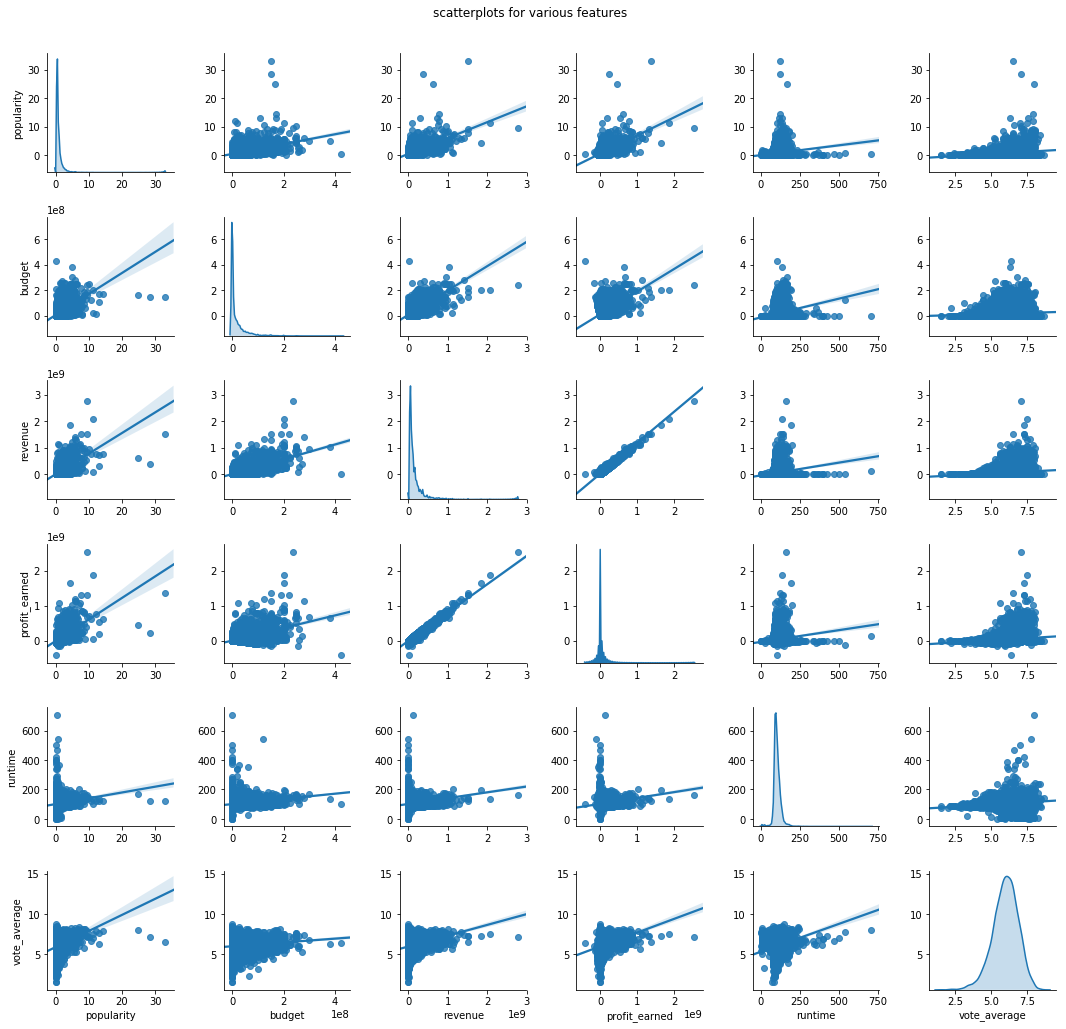

In [45]:
#Scatter plots of various features
scatter_plot = sns.pairplot(filtered_df, kind="reg", diag_kind="kde", diag_kws=dict(shade=True))
scatter_plot.fig.suptitle('scatterplots for various features\n')
scatter_plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

#### With these scatter plots, we can have a basic intution about how the relations are.Eventhough we cannot conclude anything by just looking into the correlation graphs, it just gives us a basic idea about how the variables would behave when analyzed in a better way.

### Hit Movies
For hit movies, I have considered profit to be more than 45 million (dollars) as it is more than average value of the profit earned.

In [46]:
#Select hit movies
hit_movies = tmdb_df.query('profit_earned > 45000000')
#View hit movies
hit_movies.head()

,id,popularity,budget,revenue,profit_earned,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [47]:
#Information about hit movies dataset
hit_movies.describe()

,id,popularity,budget,revenue,profit_earned,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1503.000000,1503.000000,1.503000e+03,1.503000e+03,1.503000e+03,1503.000000,1503.000000,1503.000000,1503.000000,1.503000e+03,1.503000e+03
mean,37789.867598,1.889101,5.490323e+07,2.350956e+08,1.801923e+08,113.225549,1005.008649,6.373387,2001.774451,6.278246e+07,2.961041e+08
std,67030.581387,2.026776,5.246052e+07,2.278766e+08,1.950162e+08,25.594692,1183.841324,0.717433,10.834997,5.387460e+07,2.758583e+08
min,11.000000,0.044675,0.000000e+00,4.561041e+07,4.508041e+07,44.000000,10.000000,3.900000,1960.000000,0.000000e+00,4.205324e+07
25%,1897.500000,0.868257,1.700000e+07,1.004904e+08,6.930023e+07,98.000000,263.500000,5.900000,1996.000000,2.340083e+07,1.291593e+08
50%,9762.000000,1.351237,4.000000e+07,1.592125e+08,1.111615e+08,110.000000,586.000000,6.400000,2004.000000,4.741411e+07,2.049295e+08
75%,38319.500000,2.199646,7.800000e+07,2.809649e+08,2.065617e+08,124.000000,1254.500000,6.900000,2010.000000,8.973932e+07,3.615100e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,2.544506e+09,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


### Genres for hit movies

In [48]:
#Store the value returned in the function
genres_count = category_count('genres',hit_movies)
#Printing the count of genres
genres_count

Comedy             583
Drama              558
Action             504
Thriller           440
Adventure          402
Family             260
Romance            243
Crime              225
Fantasy            218
Science Fiction    216
Horror             134
Animation          131
Mystery            122
War                 49
Music               46
History             45
Western             16
Documentary          6
dtype: int64

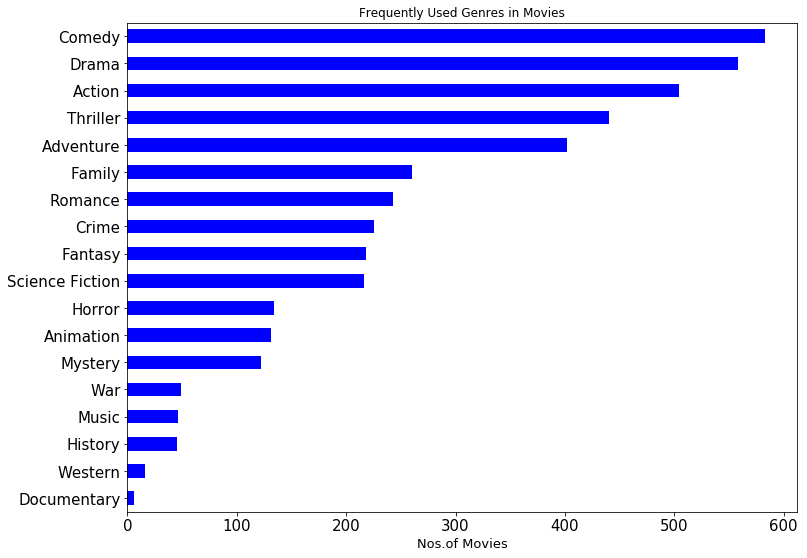

In [49]:
#Plotting the graphs in descending order of count of genres
genres_count.sort_values(ascending = True, inplace = True)

#Plot
lt = genres_count.plot.barh(color = 'blue', fontsize = 15)

#Title
lt.set(title = 'Frequently Used Genres in Movies')

# X-axis label
lt.set_xlabel('Nos.of Movies', color = 'black', fontsize = '13')

#Figure Size
lt.figure.set_size_inches(12, 9)

#Plotting the graph
plt.show()

#### Comedy, Drama, Action, Thriller, Adventure have played a major part for the movies which are successfull. 

### Top cast in hit movies

In [50]:
#Store the value returned in the function
cast_count = category_count('cast',hit_movies)
#Printing the count of top cast
top_cast = cast_count[:10]
top_cast

Tom Cruise            27
Brad Pitt             25
Tom Hanks             24
Cameron Diaz          23
Sylvester Stallone    23
Robert De Niro        21
Eddie Murphy          21
Denzel Washington     20
Jim Carrey            20
Bruce Willis          20
dtype: int64

### These are the actors who have been part of most successful movies


### Plotting the cast vs No. of movies

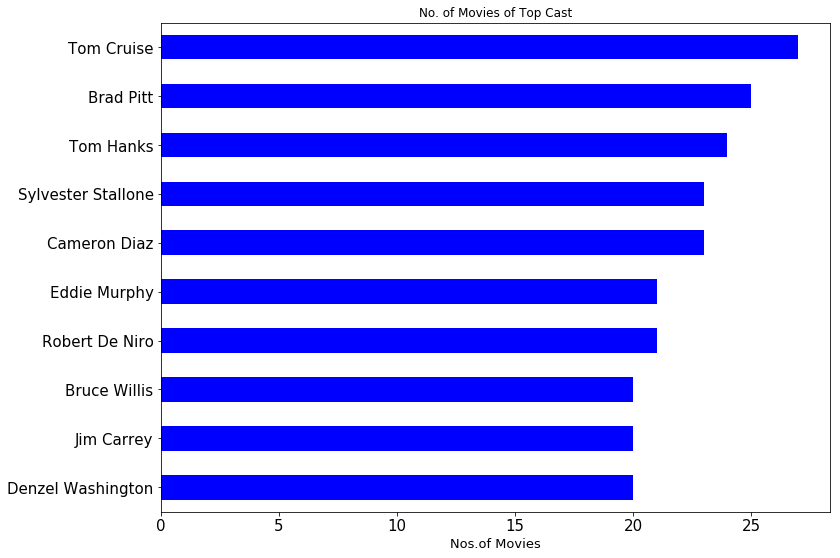

In [51]:
#Plotting the graphs in descending order of count of genres
top_cast.sort_values(ascending = True, inplace = True)

#Plot
lt = top_cast.plot.barh(color = 'blue', fontsize = 15)

#Title
lt.set(title = 'No. of Movies of Top Cast')

# X-axis label
lt.set_xlabel('Nos.of Movies', color = 'black', fontsize = '13')

#Figure Size
lt.figure.set_size_inches(12, 9)

#Plotting the graph
plt.show()

#### Plot shows the no. of movies top cast have acted.

### Correlation among features for hit movies

In [52]:
#Filter datasets
hit_filtered = hit_movies[['popularity','budget','revenue','profit_earned','runtime','vote_average']]

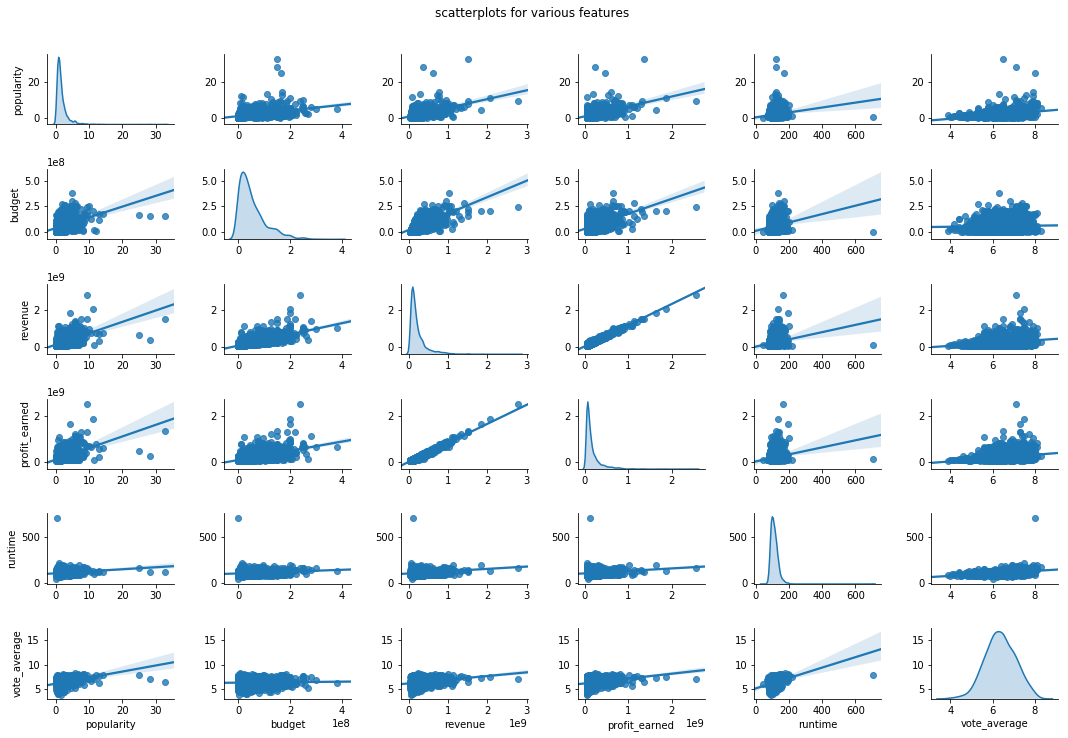

In [53]:
#Scatter plots of various features
scatter_plot = sns.pairplot(hit_filtered, kind="reg", diag_kind="kde", diag_kws=dict(shade=True))
scatter_plot.fig.suptitle('scatterplots for various features\n')
scatter_plot.fig.tight_layout(rect=[0, 0.3, 1, 0.95])

#### These Scatter plots gives a basic intution of how the relations could behave.

<a id='conclusions'></a>
## Conclusions


It was an intresting dataset with huge amount of data and a lot relations among features.I have understood a lot of facts about movies after analyzing data.

### Generalised conclusion

<ul>
    <li>Rapid increase in the number of movies produced per year.It has increased from around 100 in 1980s to more than 500 in 2015.
    <li>Tremendous increase in the budget and revenue over the years which also leads to much bigger profits for a better movie.
    <li>Comedy,Action,Drama,Thriller genres movies have contributed the most and have been the most successful.
    <li>Robert De Niro,Samuel L Jackson,Bruce Willis,Nicolas Cage have acted most movies among all the cast.
    <li>Most popular movie happened to be <b>Jurassic World</b>.
    <li>Highest profited movie is <b>Avatar</b>.
</ul> 

### Conclusion about a successful movie
<ul>
    <li> Average Budget to be around 55 million(dollars).
    <li> Average duration of the movie to be around 113 minutes.
    <li> Genres: Comedy,Drama,Action,Thriller
    <li> Cast to be one among Tom Cruise,Brad Pit,Tom Hanks,Cameron Diaz,Sylvester Stallone
</ul>
According to my analysis, following these would happen to make a profit of 180 million(dollars).

### Limitations:
<ul>
    <li>The dataset had a lot of null values which could not be replaced by using the knowledge that we have and were to be deleted.
    <li>There were more than 2500 rows which was deleted which is a huge amount of data loss.
</ul>

In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0